# IS 4487 Assignment 7: Data Transformation with Airbnb Listings

In this assignment, you will:
- Load the Airbnb dataset you cleaned in Assignment 6
- Apply data transformation techniques like scaling, binning, encoding, and feature creation
- Make the dataset easier to use for tasks like pricing analysis, guest segmentation, or listing recommendations
- Practice writing up your analysis clearly so a business audience — like a host, marketing manager, or city partner — could understand it

## Why This Matters

Airbnb analysts, hosts, and city partners rely on clean and well-structured data to make smart decisions. Whether they’re adjusting prices, identifying high-performing listings, or designing better guest experiences, they need data that’s transformed, organized, and ready for use.

This assignment helps you practice that kind of real-world thinking: taking messy real data and getting it ready for action.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_07_data_transformation.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Dataset Description

The dataset you'll be using is a **detailed Airbnb listing file**, available from [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Each row represents one property listing. The columns include:

- **Host attributes** (e.g., host ID, host name, host response time)
- **Listing details** (e.g., price, room type, minimum nights, availability)
- **Location data** (e.g., neighborhood, latitude/longitude)
- **Property characteristics** (e.g., number of bedrooms, amenities, accommodates)
- **Calendar/booking variables** (e.g., last review date, number of reviews)

The schema is consistent across cities, so you can expect similar columns regardless of the location you choose.

## 1. Setup and Load Your Data

You'll be working with the `cleaned_airbnb_data.csv` file you exported from Assignment 6.

📌 In Google Colab:
- Click the folder icon on the left sidebar
- Use the upload button to add your CSV file to the session
- Then use the code block below to read it into your notebook

Before getting started, make sure you import the libraries you'll need for this assignment:
- `pandas`, `numpy` for data manipulation
- `matplotlib.pyplot`, `seaborn` for visualizations


In [1]:
# Add code here 🔧
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('cleaned_airbnb_data.csv')
df.describe()

,id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,null_price_values
count,4.590000e+02,4.590000e+02,431.000000,446.000000,459.000000,459.000000,0.0,459.000000,459.000000,459.000000,...,391.000000,391.000000,391.000000,391.000000,459.000000,459.000000,459.000000,459.0,391.000000,459.000000
mean,8.055481e+17,2.525275e+08,0.957448,0.878655,31.572985,52.172113,NaN,42.658694,-73.776369,3.448802,...,4.841586,4.861688,4.656087,4.718414,6.742919,4.779956,1.962963,0.0,1.986982,0.087146
std,5.352960e+17,2.006642e+08,0.137379,0.226504,158.860381,308.399586,NaN,0.010116,0.018573,2.465282,...,0.310672,0.269378,0.397570,0.384653,6.381206,5.874372,3.851606,0.0,1.946644,0.282357
min,2.992450e+06,6.576000e+04,0.000000,0.000000,1.000000,1.000000,NaN,42.630660,-73.876490,1.000000,...,2.000000,3.000000,2.500000,1.000000,1.000000,0.000000,0.000000,0.0,0.030000,0.000000
25%,5.403460e+07,4.762598e+07,0.980000,0.870000,2.000000,2.000000,NaN,42.652590,-73.788709,2.000000,...,4.825000,4.845000,4.500000,4.660000,1.000000,1.000000,0.000000,0.0,0.590000,0.000000
50%,9.382804e+17,2.329679e+08,1.000000,0.980000,5.000000,6.000000,NaN,42.657921,-73.773670,2.000000,...,4.940000,4.960000,4.800000,4.820000,3.000000,2.000000,0.000000,0.0,1.350000,0.000000
75%,1.264937e+18,4.330961e+08,1.000000,1.000000,15.000000,17.000000,NaN,42.665027,-73.763310,4.000000,...,5.000000,5.000000,4.930000,4.950000,12.000000,6.000000,1.500000,0.0,2.915000,0.000000
max,1.479181e+18,7.054771e+08,1.000000,1.000000,1258.000000,2648.000000,NaN,42.714900,-73.738250,16.000000,...,5.000000,5.000000,5.000000,5.000000,21.000000,21.000000,13.000000,0.0,11.480000,1.000000


## 2. Check for Skew in a Numeric Column

Business framing:  

Airbnb listings can have a wide range of values for things like price, availability, or reviews. These kinds of distributions can be hard to visualize, summarize, or model.

Choose one **numeric column** that appears skewed and do the following:
- Plot a histogram
- Apply a transformation (e.g., log or other method)
- Plot again to compare


### In Your Response:
1. What column did you examine?
2. What transformation did you try, and why?
3. How did the transformed version help make the data more usable for analysis or stakeholder review?



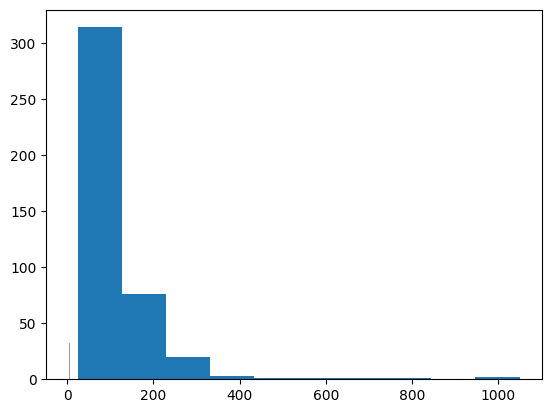

In [2]:
# Add code here 🔧
plt.hist(df['price'])
plt.hist(np.log(df['price']))
plt.show()

### ✍️ Your Response: 🔧
1. The column that I examined was Price.

2. The transformation that I tried was log. This is because it is  useful for addressing right-skewed data distributions, which Price is.

3. This transformation allos the data to conform more closely to a normal distribution. This allows us to use analysis that assume normality. This transformation can also significantly reduces the impact of outliers and skewed distributions on models.

## 3. Scale Two Numeric Columns

Business framing:

If an analyst wanted to compare listing price to number of nights required, or create a model that weighs both, those values need to be on a similar scale.

Follow these steps:
- Pick two numeric columns with different value ranges (e.g. one column may have a min of 0 and a max of 255; another column may have a min of 100 and a max of 400)
- Use Min-Max scaling on one column (the range should be “shrinked” down to just 0-1)
- Use Z-score Normalization (aka standardization) on the other column.
- Add 2 new columns to the dataset. These 2 new columns should be the ones you just created.

### In Your Response:
1. What two columns did you scale, and which methods did you use?
2. When might these scaled values be more useful than the originals?
3. Who at Airbnb might benefit from this transformation and why?

In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max scale
min_max_scaler = MinMaxScaler()
df['host_total_listings_count_min_max_scaled'] = min_max_scaler.fit_transform(df[['host_total_listings_count']])

# Z-score scale
z_score_scaler = StandardScaler()
df['reviews_per_month_z_score_scaled'] = z_score_scaler.fit_transform(df[['reviews_per_month']])


### ✍️ Your Response: 🔧
1. The two columns that I scaled were host_total_listings_count and reviews_per_month. I used Min-Max Scaleing and Z-Score Scaling.

2. These might be more useful than the original when comparing variables, in order to normalize them. The models would be able to use them better

3. The people who are are using the models to make business decisions will benefit from the model because they will be able to make more informed decisions as the variables will be better comparable and valuable.

## 4. Group a Numeric Column into Categories

Business framing:  

Let’s say an Airbnb marketing team wants to segment listings by review activity. They don’t want exact numbers — they just want to know if a listing has “low,” “medium,” or “high” review volume.

Follow these steps:

- Choose a numeric column that could be grouped (e.g., reviews, availability).
- You’ll want to group the values of this column into 3 or 4 bins
- Create a new column. The values of this column will be the labels: “Low”, “Medium”, and “High.” These labels should correspond to your bins.

### In Your Response:
1. What column did you group, and how many categories did you use?
2. Why might someone prefer this grouped view over raw numbers?
3. Who would this help at Airbnb, and how?


In [9]:
# Add code here 🔧
df['reviews_per_month_binned'] = pd.cut(df['reviews_per_month'], bins=3, labels=['Low', 'Medium', 'High'])

### ✍️ Your Response: 🔧
1. I used three categories "Low", "Medium", and "High", and I grouped reviews_per_month.

2. Someone would prefer this grouped view over raw numbers to allow them to see the data better, and visualize how man reviews fall in these categories.

3. This would help the hosts at Airbnb see whether they are getting rated highly more than lowly, and other similar applications. This will allow them to see things like whether their listings are getting review bombed or genuinely not good, and similar with the good reviews as well.

## 5. Create Two New Business-Relevant Variables

Business framing:  

Stakeholders often want to know things like: What’s the cost per night? Are listings geared toward long-term stays? These kinds of features aren’t always in the dataset — analysts create them.

Follow these steps:

- Think of two new columns you can create using the data you already have.
  - One might be a ratio or interaction between columns (e.g., price ÷ nights).
  - The other might be a flag based on a condition (e.g., stays longer than 30 days).
- Add the new columns to your DataFrame.

### In Your Response:
1. What two new columns did you create?
2. Who would use them (e.g., host, manager, or platform)?
3. How could they help someone make a better decision?

In [10]:
# Add code here 🔧
df['price_per_night'] = df['price'] / df['minimum_nights']
df['is_long_stay'] = df['minimum_nights'] > 30

### ✍️ Your Response: 🔧 🔧
1. The two new columns I created was price_per_night and is_long_stay.

2. The platform would use the price_per_night to show customers the cost of the listings per night. The hosts would use the is_long_stay to see how long their guests tend to stay.

3. The price_per_night would help the customers see how much they would pay per night like a hotel, and be able to price compare much better, and even compare to hotels. The is_long_stay would allow the hosts to gear their Airbnb's accorrdingly to their clientile. For example, having amenities or information on their listing that people who are staying for a shorter time woudn't have.



## 6. Encode a Categorical Column

Business framing:  

Let’s say you’re helping the Airbnb data science team build a model to predict booking rates. Categorical columns like `room_type`, `neighbourhood`, or `cancellation_policy` can’t be used in models unless they’re converted to numbers.

- Choose one categorical column from your dataset (e.g., room type or neighborhood group)
- Decide on an encoding method:
  - Use one-hot encoding for nominal (unordered) categories
  - Use ordinal encoding (a ranking) only if the categories have a clear order
- Apply the encoding using `pandas` or another tool
- Add the new encoded column(s) to your DataFrame

### ✍️ In your markdown:
1. What column did you encode and why?
2. What encoding method did you use?
3. How could this transformation help a pricing model, dashboard, or business report?



In [11]:
# Add code here 🔧
df_encoded = pd.get_dummies(df, columns=['room_type'])

### ✍️ Your Response: 🔧
1. I encoded roome_type, because room_type is a considerable deciding factor for customers when deciding an Airbnb
2. I used one-hot encoding.
3. This could help a pricing model by allowing room_type to be modeled along with price to see the affects of the type of room on the price of the listing.

## 7. Reflection

You’ve applied the same kinds of transformation techniques used in real Airbnb analytics projects — from pricing engines to host tools to tourism dashboards.

Now step back and reflect.

### In Your Response:
1. What transformation step felt most important or interesting?
2. Which of your changes would be most useful to a host, analyst, or city planner?
3. If you were going to build a tool or dashboard, what would you do next with this data?
4. How does this relate to your customized learning outcome you created in canvas?



### ✍️ Your Response: 🔧

1.

2.

3.

4.



## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [7]:
!jupyter nbconvert --to html "assignment_07_AndradeLeslie.ipynb"

[NbConvertApp] WARNING | pattern 'assignment_07_LastnameFirstname.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes